# Лабораторная работа 1

### Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from pandas.plotting import autocorrelation_plot
from datetime import datetime
import statsmodels.api as sm

### Загрузка данных временного ряда с ценами активов Ростелекома

In [2]:
df = pd.read_csv("RTKM.csv", sep=',', parse_dates=["<DATE>"], index_col="<DATE>", dayfirst=True)
df = df.drop(columns=["<TICKER>", "<TIME>", "<PER>"])
df.index = pd.to_datetime(df.index)
print(df)

            <OPEN>  <HIGH>  <LOW>  <CLOSE>     <VOL>
<DATE>                                              
2021-01-04   97.11   98.60  96.51    96.86   1924090
2021-01-05   97.10  101.50  96.41   100.38   5750760
2021-01-06  100.60  100.87  98.63    99.16   3245600
2021-01-08   99.70  101.18  99.32   100.29   3091080
2021-01-11   99.99  100.62  98.31    99.58   3187700
...            ...     ...    ...      ...       ...
2024-09-27   75.10   77.43  74.80    76.67  13169100
2024-09-30   76.50   77.89  75.64    75.83   5153180
2024-10-01   75.83   76.37  74.63    74.67   3467320
2024-10-02   75.01   75.40  72.92    72.99   4802930
2024-10-03   73.02   73.43  70.87    71.05   3146580

[936 rows x 5 columns]


### Отображение данных на графике

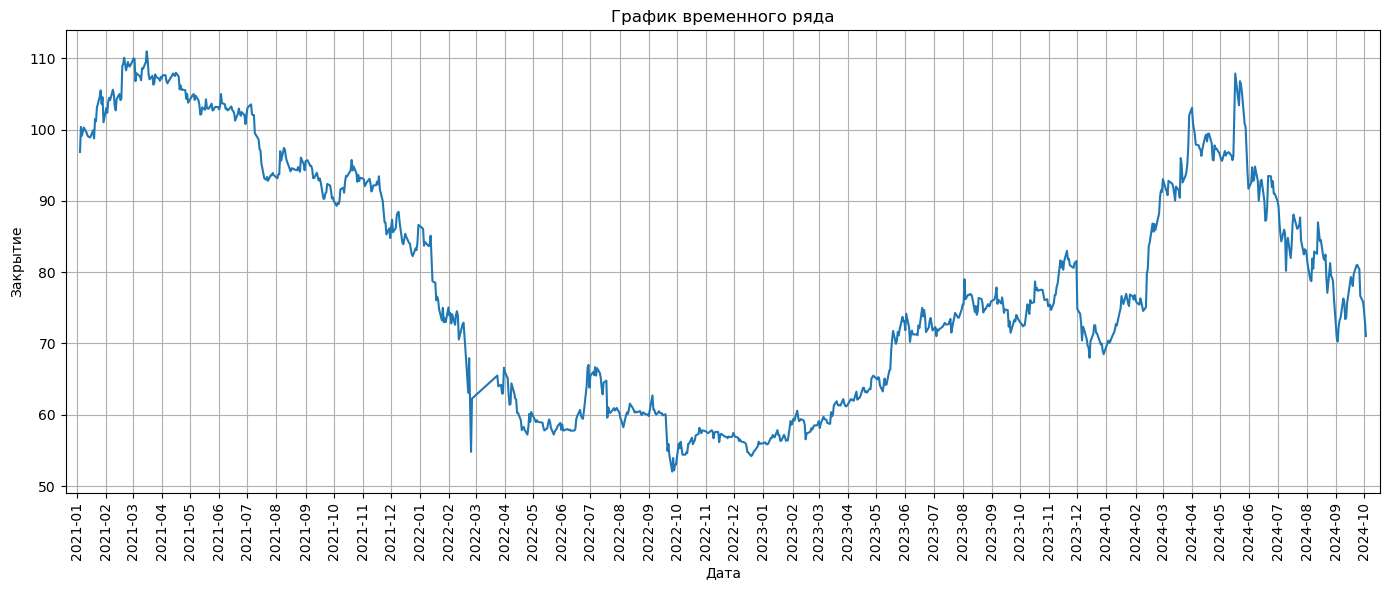

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["<CLOSE>"])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().set_xlim(df.index[0]-pd.Timedelta(days=15), df.index[-1]+pd.Timedelta(days=15))
plt.xlabel("Дата")
plt.ylabel("Закрытие")
plt.title("График временного ряда")
plt.gcf().autofmt_xdate()
plt.xticks(rotation=90, ha="center")
plt.tight_layout()
plt.grid()
plt.show()

Исходя из полученного графика, можно сделать вывод, что цена активов Ростелекома в период с января 2021 года по октябрь 2024 года цена колеблется в диапазоне от 55 до 110 рублей.

### Cкользящее среднее

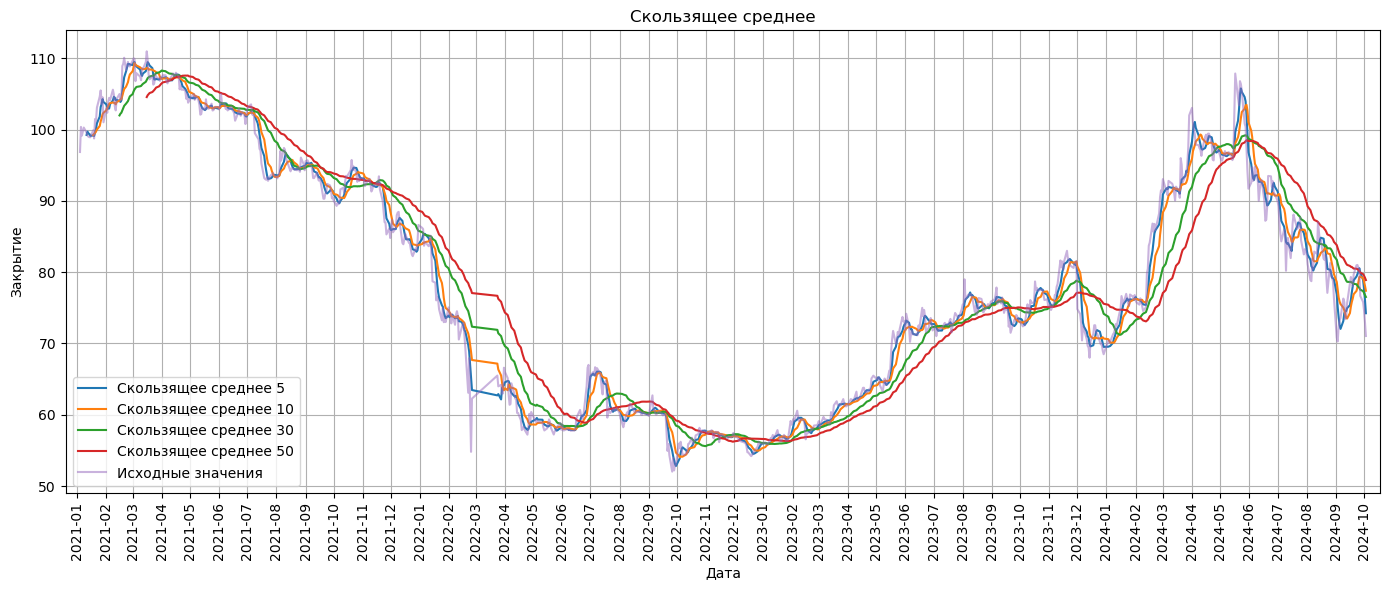

In [4]:
window_sizes = [5, 10, 30, 50]
plt.figure(figsize=(14, 6))

for window in window_sizes:
    rolling_mean = df["<CLOSE>"].rolling(window=window).mean()
    plt.plot(df.index, rolling_mean, label=f"Скользящее среднее {window}")

plt.plot(df.index, df["<CLOSE>"], label="Исходные значения", alpha=0.5)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().set_xlim(df.index[0]-pd.Timedelta(days=15), df.index[-1]+pd.Timedelta(days=15))
plt.xlabel("Дата")
plt.ylabel("Закрытие")
plt.title("Скользящее среднее")
plt.legend()
plt.xticks(rotation=90, ha="center")
plt.tight_layout()
plt.grid()
plt.show()

Благодаря скользящему окну можно увидеть график без резких колебаний и оценить общую динамику. Видно, что цена колеблется в диапазоне от 55 до 110 рублей.

### Экспоненциальные скользящие средние

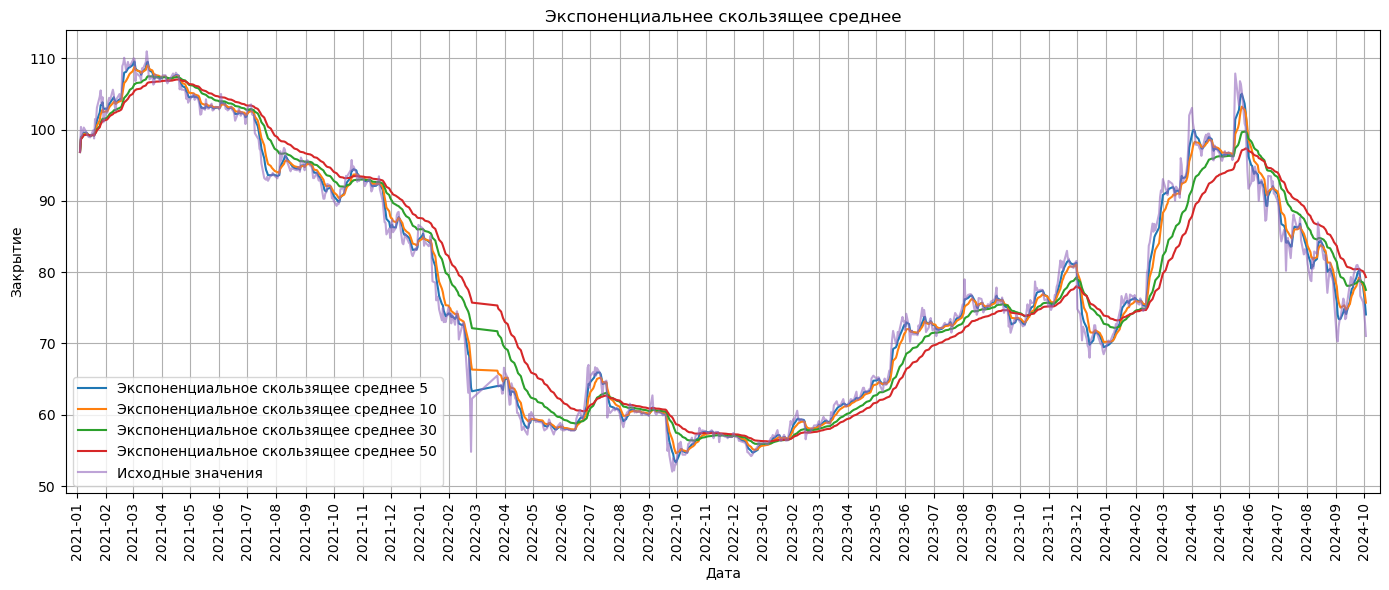

In [5]:
plt.figure(figsize=(14, 6))

for window in window_sizes:
    exp_moving_avg = df["<CLOSE>"].ewm(span=window).mean()
    plt.plot(df.index, exp_moving_avg, label=f"Экспоненциальное скользящее среднее {window}")

plt.plot(df.index, df["<CLOSE>"], label="Исходные значения", alpha=0.6)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().set_xlim(df.index[0]-pd.Timedelta(days=15), df.index[-1]+pd.Timedelta(days=15))
plt.xlabel("Дата")
plt.ylabel("Закрытие")
plt.title("Экспоненциальнее скользящее среднее")
plt.legend()
plt.xticks(rotation=90, ha="center")
plt.tight_layout()
plt.grid()
plt.show()

Благодаря экспоненциальному скользящему окну можно увидеть график без учёта резких колебаний, но с большей повторяемостью изначального графика. Видно, что цена колеблтся в диапазоне от 55 до 110 рублей.

### Прогнозирование

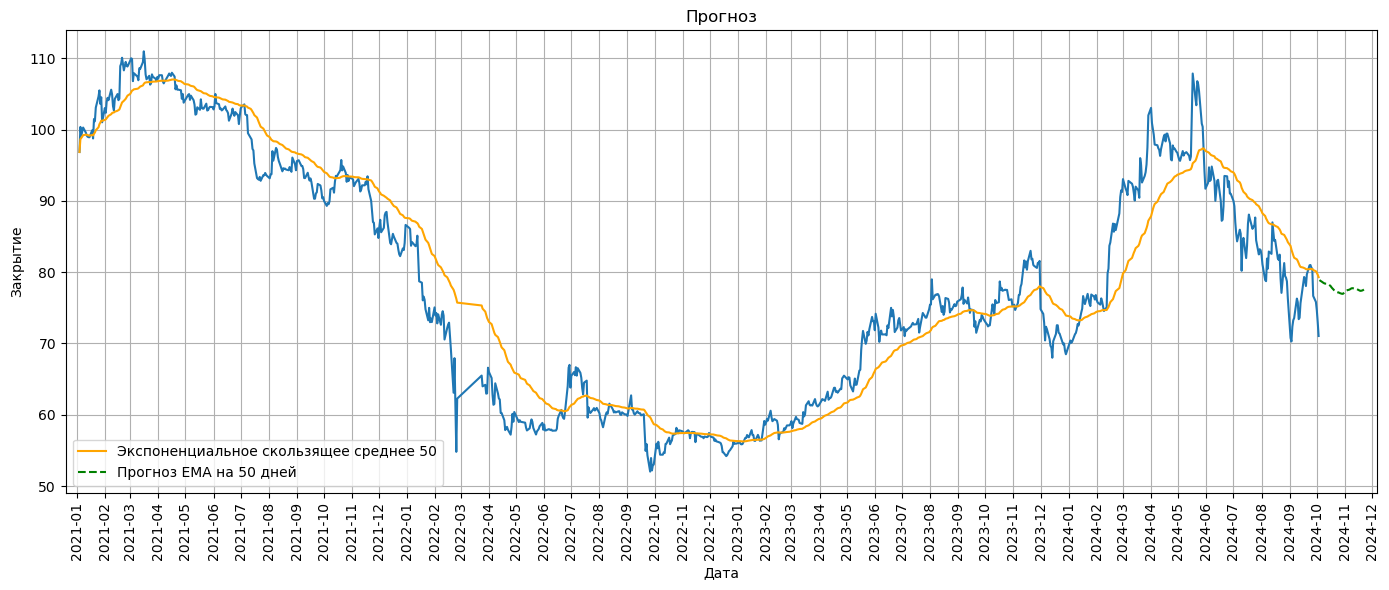

In [6]:
window_size = 50
ema = df["<CLOSE>"].ewm(span=window_size).mean()
forecast_days = 50
last_known_date = df.index[-1]
future_dates = [last_known_date + pd.Timedelta(days=i) for i in range(1, forecast_days + 1)]

future_ema=[]
last_values = df['<CLOSE>'][-window_size:].tolist()
for i in range(forecast_days):
    future_value = np.mean(last_values)
    future_ema.append(future_value)
    last_values.pop(0)
    last_values.append(future_value)

future_df = pd.DataFrame(data=future_ema, index=future_dates, columns=['Forecast'])

combined_df = pd.concat([df, future_df])

plt.figure(figsize=(14, 6))
plt.plot(df.index, df["<CLOSE>"])
plt.plot(ema, label=f"Экспоненциальное скользящее среднее {window_size}", color="orange")
plt.plot(future_df, label='Прогноз EMA на 50 дней', color='green', linestyle='dashed')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().set_xlim(df.index[0]-pd.Timedelta(days=15), future_dates[-1]+pd.Timedelta(days=15))
plt.xlabel("Дата")
plt.ylabel("Закрытие")
plt.title("Прогноз")
plt.legend()
plt.gcf().autofmt_xdate()
plt.xticks(rotation=90, ha="center")
plt.tight_layout()
plt.grid()
plt.show()

### Вывод

В результате работы был получен прогноз стоимости актива на 50 дней. Согласно прогнозу, стоимость актива будет в среднем 77 рублей.